# Prediction of Breast Cancer using SVM with 99% accuracy

https://www.kaggle.com/junkal/breast-cancer-prediction-using-machine-learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

## Exploratory analysis

In [2]:
dataset = pd.read_csv('cancer.csv')
cols = dataset.columns.tolist()
cols = cols[0:1] + cols[2:33] + [cols[1]]
dataset = dataset[cols]
dataset.head()

,id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimensionthread,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


## Data visualisation and pre-processing

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(dataset['diagnosis'])

y = np.bincount(Y)
ii = np.nonzero(y)[0]
print(list(zip(ii,y[ii]) ))

print(dataset.groupby('diagnosis').size())

[(0, 357), (1, 212)]
diagnosis
B    357
M    212
dtype: int64


Density plots. Shows a general gaussian distribution.

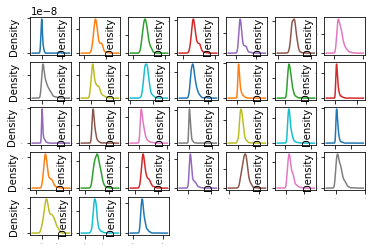

In [9]:
dataset.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()

Correlations

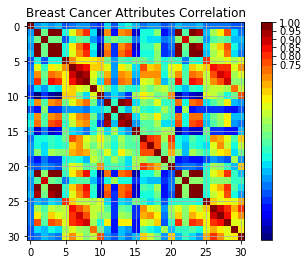

In [11]:
from matplotlib import cm as cm

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(dataset.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Breast Cancer Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

* Split the data into predictor variables and target variable.
* Breaking them into train and test sets.

20% of the data as test set.

In [16]:
X = dataset.drop('diagnosis', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

## Baseline algorithm checking

10 fold cross validation for each testing.

Classification and Regression Trees (CART), Linear Support Vector Machines (SVM), Gaussian Naive Bayes (NB) and k-Nearest Neighbors (KNN)

In [17]:
models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC()))
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

In [18]:
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, random_state=123)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

CART: 0.912174 (0.041719) (run time: 0.126095)
SVM: 0.619614 (0.082882) (run time: 0.127019)
NB: 0.619565 (0.076432) (run time: 0.017290)
KNN: 0.749227 (0.035641) (run time: 0.027798)


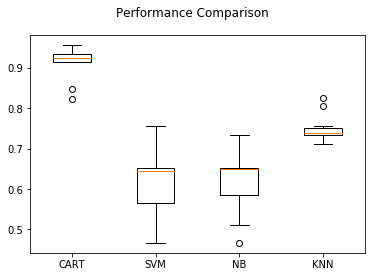

In [19]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

GaussianNB, KNN and CART performed the best given the dataset (all above 92% mean accuracy). Support Vector Machine has a surprisingly bad performance here. However, if we standardise the input dataset, it's performance should improve.

## Evaluation of algorithm on Standardised Data

In [20]:
import warnings

# Standardize the dataset
pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledCART: 0.927633 (0.023752) (run time: 0.094323)
ScaledSVM: 0.964879 (0.031588) (run time: 0.059470)
ScaledNB: 0.929710 (0.042736) (run time: 0.019301)
ScaledKNN: 0.958357 (0.038595) (run time: 0.031687)


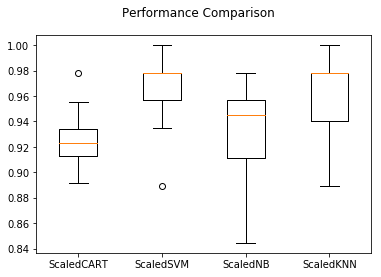

In [21]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


Drastic improvement of SVM.

## Algorithm Tuning - Tuning SVM

- the value of C
- the type of kernel

The default C for SVM is 1.0 and the kernel is Radial Basis Function (RBF). We will use the grid search method using 10-fold cross-validation with a standardized copy of the sample training dataset. We will try over a combination of C values and the following kernel types 'linear', 'poly', 'rbf' and 'sigmoid.

In [22]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.969231 using {'C': 2.0, 'kernel': 'rbf'}
0.962637 (0.023993) with: {'C': 0.1, 'kernel': 'linear'}
0.824176 (0.063238) with: {'C': 0.1, 'kernel': 'poly'}
0.938462 (0.036608) with: {'C': 0.1, 'kernel': 'rbf'}
0.947253 (0.032949) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.960440 (0.027359) with: {'C': 0.3, 'kernel': 'linear'}
0.861538 (0.054730) with: {'C': 0.3, 'kernel': 'poly'}
0.956044 (0.031308) with: {'C': 0.3, 'kernel': 'rbf'}
0.956044 (0.035653) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.956044 (0.030933) with: {'C': 0.5, 'kernel': 'linear'}
0.879121 (0.053422) with: {'C': 0.5, 'kernel': 'poly'}
0.958242 (0.033463) with: {'C': 0.5, 'kernel': 'rbf'}
0.960440 (0.029199) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.956044 (0.025909) with: {'C': 0.7, 'kernel': 'linear'}
0.885714 (0.043010) with: {'C': 0.7, 'kernel': 'poly'}
0.964835 (0.042188) with: {'C': 0.7, 'kernel': 'rbf'}
0.956044 (0.027787) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.953846 (0.026546) with: {'C': 0.9, 'kernel': 'linear'

We can see the most accurate configuration was SVM with an RBF kernel and C=1.5, with the accuracy of 96.92%.

## Application of SVC on dataset

In [ ]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = SVC(C=2.0, kernel='rbf')
start = time.time()
model.fit(X_train_scaled, Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

In [ ]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

In [ ]:
print(confusion_matrix(Y_test, predictions))